<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-and-Metric" data-toc-modified-id="Exploratory-Data-Analysis-and-Metric-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis and Metric</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Submit" data-toc-modified-id="Submit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Submit</a></span></li><li><span><a href="#Homework" data-toc-modified-id="Homework-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Часть-1.-(4-балла)" data-toc-modified-id="Часть-1.-(4-балла)-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Часть 1. (4 балла)</a></span></li><li><span><a href="#Часть-2.-(3-баллов)" data-toc-modified-id="Часть-2.-(3-баллов)-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Часть 2. (3 баллов)</a></span></li></ul></li></ul></li></ul></div>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
from collections import Counter
import numpy as np
import pymorphy2

In [33]:
SEED = 42

**[Kaggle InClass: Language Detection](https://www.kaggle.com/t/6b23f7b92b4b497e9aead739dd00ae1a)**

# Exploratory Data Analysis and Metric

In [34]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [35]:
train_df.shape, test_df.shape

((3159633, 2), (2784634, 2))

In [36]:
train_df.head(15)

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
5,"Na primjer , pjesnik ga opisuje ovako .",hr
6,Semua rerumputan itu sekarang menutupi tanah s...,id
7,Det är en enorm utmaning för oss att göra det .,sv
8,Ono što ćete vidjeti - trebat ćete skočiti ovd...,hr
9,( Alqışlar ) Excel-dən istifadə etmişəm .,az


In [37]:
test_df.head(15)

,index,sentence
0,0,תודה לכם .
1,1,"Precisamos de compaixão para começar , e auto-..."
2,2,這個增長相當大 ， 並且它將引發經濟的增長 。
3,3,시애틀에서 자란 제가 처음 가난을 보게 되던 때를 기억해요 .
4,4,これをロボットに組み込みました
5,5,所以他們拿了紅綠藍 ， 不是只拿訂單上的部分貨物 。
6,6,"Van , aki felelősségteljesen ."
7,7,"Geen enkele , want Disney is niet van plan om ..."
8,8,"Я хотел вас оставить сегодня с идеей , что есл..."
9,9,"Najuzbudljivija je Harlem dječja zona , koja v..."


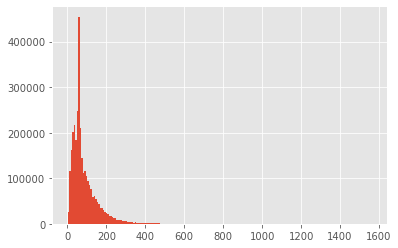

In [38]:
train_df.sentence.str.len().hist(bins=200);

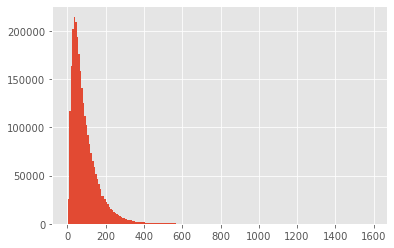

In [39]:
test_df.sentence.str.len().hist(bins=200);

In [40]:
df = train_df[train_df.sentence.str.len() < 2].reset_index(drop=True)
pd.options.display.max_rows = 200
df

,sentence,language
0,-,cs
1,是,zh-tw
2,-,fr
3,好,zh-tw
4,예,ko
5,7,ko
6,好,zh-tw
7,Ồ,vi
8,嘿,zh-tw
9,好,zh-tw


In [41]:
dff = test_df[test_df.sentence.str.len() < 2].reset_index(drop=True)
pd.options.display.max_rows = 200
dff

,index,sentence
0,54723,-
1,86082,日
2,158646,.
3,163848,血
4,169470,3
5,169545,.
6,215852,-
7,227457,對
8,243420,`
9,260206,哇


In [42]:
df1 = train_df[train_df.sentence.str.len() < 3].reset_index(drop=True)
df1 = df1[df1.sentence.str.len() > 1].reset_index(drop=True)
pd.options.display.max_rows = 600
df1

,sentence,language
0,谢谢,zh-cn
1,好啦,zh
2,うん,ja
3,开拍,zh-cn
4,ええ,ja
5,あー,ja
6,谢谢,zh-cn
7,謝謝,zh-tw
8,谢谢,zh-cn
9,謝謝,zh-tw


In [43]:
df2 = train_df[train_df.sentence.str.len() < 4].reset_index(drop=True)
df2 = df2[df2.sentence.str.len() > 2].reset_index(drop=True)
pd.options.display.max_rows = 600
df2

,sentence,language
0,对 。,zh-cn
1,どうも,ja
2,분홍색,ko
3,它很美,zh-cn
4,谢谢你,zh-cn
5,۳.۰,fa
6,И ?,bg
7,有可能,zh-cn
8,終わり,ja
9,هيا,ar


In [44]:
df3 = train_df[train_df.sentence.str.len() < 5].reset_index(drop=True)
df3 = df3[df3.sentence.str.len() > 3].reset_index(drop=True)
pd.options.display.max_rows = 2000
df3

,sentence,language
0,１分間の,ja
1,探明含义,zh-cn
2,謝謝 ！,zh-tw
3,나마스테,ko
4,תודה,he
5,謝謝大家,zh-tw
6,她站出來,zh-tw
7,15年後,ja
8,謝謝 。,zh-tw
9,謝謝 ！,zh-tw


In [45]:
lang_count = (
    train_df.language.value_counts()
    .to_frame()
    .reset_index()
)

lang_count.head()

,index,language
0,ru,181970
1,en,157655
2,fr,148585
3,vi,113193
4,ar,110032


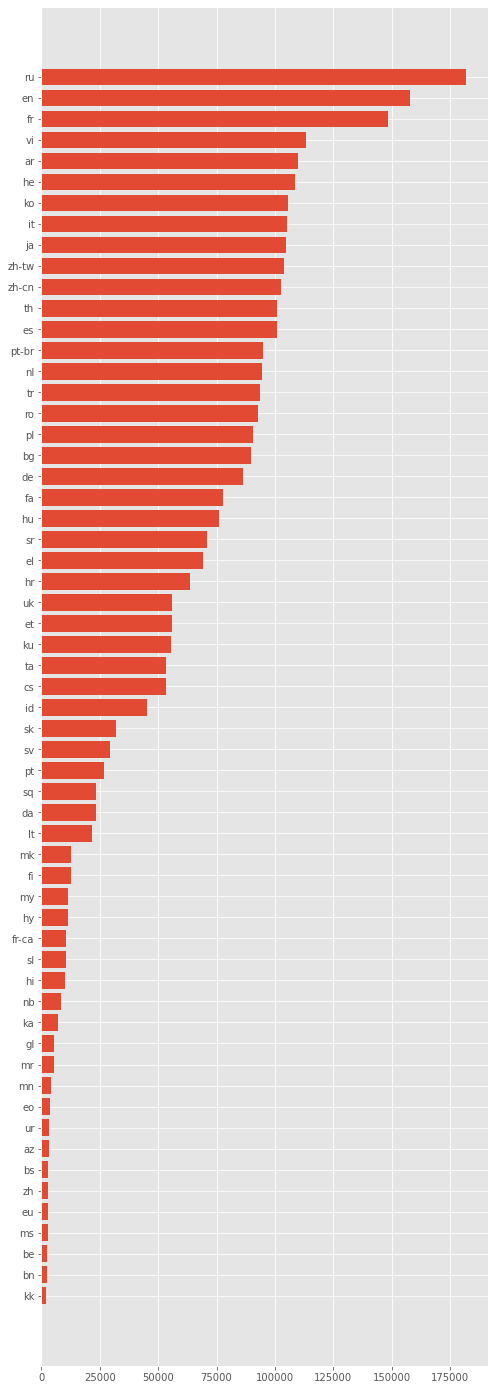

In [46]:
fig, ax = plt.subplots(figsize=(8,25))

ax.barh(lang_count['index'], lang_count['language'])
ax.invert_yaxis();

In [47]:
lang_count[lang_count['index'].apply(lambda x: x in {"en", "kk"})]

,index,language
1,en,157655
58,kk,2046


Датасет сильно не сбалансирован по классам, а требуется хорошее качество для всех языков, поэтому метрика в данном соревновании — взвешенная доля правильных ответов:

$$ 
\text{WeightedAccuracy}\left(y, \hat{y}, w\right) = \frac{\displaystyle{\sum_{i=1}^{n}} w_i \cdot \left(y_i == \hat{y}_i\right)}{\displaystyle\sum_{i=1}^{n} w_i } 
$$

Веса выбирались обратно пропорционально количеству примеров соответствующего языка:
$$
w\left(\text{"en"}\right) \sim \frac{1}{157655}
$$
$$ \dots $$
$$
w\left(\text{"kk"}\right) \sim \frac{1}{2046}
$$

Поэтому для валидации можно использовать [sklearn.metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score)

# Model

In [48]:
x = train_df.values[:,  0]
label_encoder = LabelEncoder().fit(train_df.values[:, 1])
y = label_encoder.transform(train_df.values[:, 1])

In [49]:
len(label_encoder.classes_)

59

In [50]:
import nltk
from tqdm import tqdm_notebook
ll=len(x)
for i in tqdm_notebook(range(0,ll)):
    x[i]=nltk.tokenize.casual_tokenize(x[i])

<ipython-input-50-a93e5a3b79d7>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,ll)):


In [51]:
#потом удалить
#слова из разных языков в одном
#elementary_dict=dict()
#for i in range(0, len(label_encoder.classes_)):
#    elementary_dict[i]=0
#occurence1 = dict()
#for doc in tqdm_notebook(x):
#    for token in doc:
#        occurence1[token] = elementary_dict.copy()
#for i in tqdm_notebook(range(0,len(x))): #исправленная ошибка для нижней версии
#    doc=x[i]
#    for token in doc:
#        occurence1[token][y[i]]+= 1
#простейшая оценка
#eval_dict=dict()
#for i in range(1, len(label_encoder.classes_)+1):
#    eval_dict[i]=[]
#функция оценки
#def mark(vocab):
#    res=0
#    for i in range(0,59):
#        #print(vocab)
#        if vocab[i]!=0:
#            res+=1
#    return res
#само оценивание
#for word in tqdm_notebook(occurence1):
#    beta=mark(occurence1[word])
#    eval_dict[beta].append(word)

In [52]:
#for i in eval_dict:
#    if eval_dict[i]!=[]:
#        print(i)

In [53]:
nltklang=['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek','hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
thr={',','...','.',';','?','!','#','%','*','(',')','{','}','/','\"','\'','-','_','+','-','='}
stopword_set = set()
for i in nltklang:
    stopword_set = stopword_set.union(set(nltk.corpus.stopwords.words(i)))
stopword_set = stopword_set.union(thr)

In [54]:
cleaned_x=x.copy()
x=[]

In [55]:
ll=len(cleaned_x)
for i in tqdm_notebook(range(0,ll)):
   cl=[]
   for token in cleaned_x[i]:
        if token not in stopword_set:
            cl.append(token)
   cleaned_x[i]=cl

<ipython-input-55-ff981aba5ab4>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,ll)):


In [56]:
#является ли строка числом
def is_digit(string):
    if string.isdigit():
       return True
    else:
        try:
            float(string)
            return True
        except ValueError:
            return False

In [57]:
import pymorphy2
lemmatizer_cache = {}
lemmatizer = pymorphy2.MorphAnalyzer()
def lemmatize(token):
    if lemmatizer.word_is_known(token):
        if token not in lemmatizer_cache:
            lemmatizer_cache[token] = lemmatizer.parse(token)[0].normal_form
        return lemmatizer_cache[token]
    return token

In [58]:
x1=[]
y1=[]
length1=len(cleaned_x)
for j in tqdm_notebook(range(0,length1)):
    temp=[]
    l=cleaned_x[j]
    for word in l:
        if is_digit(word)==False:
           temp.append(lemmatize(word))
    if temp!=[]:
        x1.append(temp)
        y1.append(y[j])

<ipython-input-58-e0b371d6f2ec>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm_notebook(range(0,length1)):


In [59]:
length=len(x1)
cleaned_x=[]
x=[]
y=[]
xx1=np.ndarray(shape=(length,),dtype=list)
yy1=np.ndarray(shape=(length,),dtype=int)
for i in tqdm_notebook(range(0,length)):
    xx1[i]=x1[i]
    yy1[i]=y1[i]    

<ipython-input-59-85696c83e0cd>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,length)):


In [60]:
ll=len(xx1)
for i in tqdm_notebook(range(0,ll)):
    l2=len(xx1[i])
    for j in range(0,l2):
        xx1[i][j]=xx1[i][j].lower()    

<ipython-input-60-b29612d5ddd3>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,ll)):


In [61]:
#слова из разных языков в одном
elementary_dict=dict()
for i in range(0, len(label_encoder.classes_)):
    elementary_dict[i]=0
occurence1 = dict()
for doc in tqdm_notebook(xx1):
    for token in doc:
        occurence1[token] = elementary_dict.copy()
for i in range(0,len(xx1)):
    doc=xx1[i]
    for token in doc:
        occurence1[token][yy1[i]]+= 1

<ipython-input-61-01340202e79a>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(xx1):


In [62]:
#простейшая оценка
eval_dict=dict()
for i in range(1, len(label_encoder.classes_)+1):
    eval_dict[i]=[]
#функция оценки
def mark(vocab):
    res=0
    for i in range(0,59):
        #print(vocab)
        if vocab[i]!=0:
            res+=1
    return res
#само оценивание
for word in tqdm_notebook(occurence1):
    beta=mark(occurence1[word])
    eval_dict[beta].append(word)

<ipython-input-62-020468442d08>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for word in tqdm_notebook(occurence1):


In [63]:
for i in eval_dict:
    if eval_dict[i]!=[]:
        print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
52
53
54
55
56
57
58
59


In [76]:
eval_dict[40]

['internet',
 'ii',
 'los',
 'mr',
 'al',
 'lee',
 'grand',
 'super',
 'darpa',
 'park',
 'news',
 'martin']

In [94]:
eval_dict1=dict()
for i in range(0, 101):
    eval_dict1[i]=[]
#функция оттносительной оценки
def relat_mark(vocab):
    res=0
    summ=0
    params=[]
    for i in range(0,59):
        #print(vocab)
        if vocab[i]!=0:
            res+=1
            summ+=vocab[i]
            params.append(vocab[i])
    res=int(max(params)/summ*100)
    return res
#само оценивание
for word in tqdm_notebook(occurence1):
    beta=relat_mark(occurence1[word])
    eval_dict1[beta].append(word)

<ipython-input-94-d76395e3875a>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for word in tqdm_notebook(occurence1):


[393, 4, 7, 317]
721
54



In [98]:
#for i in eval_dict1:
#    if eval_dict1[i]!=[]:
#        print(i)

In [99]:
#eval_dict1[5]

In [104]:
step=51
delete=set()
for i in tqdm_notebook(range(1,step)):
    temp=eval_dict1[i]
    for word in temp:
        delete.add(word)

<ipython-input-104-566540ce9c09>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(1,step)):


In [105]:
for i in tqdm_notebook(range(0,len(xx1))):
    temp=[]
    for word in xx1[i]:
        if word not in delete:
            temp.append(word)
    if temp!=[]:
        xx1[i]=temp
    else:
        temp.append('')
        xx1[i]=temp

<ipython-input-105-c9a015480b0d>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,len(xx1))):


In [106]:
occurence1=[]
eval_dict=[]
eval_dict1=[]

In [107]:
#occurence = Counter()
#for doc in tqdm_notebook(xx1):
#    for token in doc:
#        occurence[token] += 1
#remove=occurence.most_common(100)
#removal=[]
#for i in tqdm_notebook(range(0,100)):
#    if is_digit(str(remove[i][0]))==True:
#        removal.append(remove[i][1])
#    else:
#        removal.append(remove[i][0])
#for i in tqdm_notebook(range(0,ll)):
#    temp=[]
#    l2=len(xx1[i])
#    for j in range(0,l2):
#        if xx1[i][j] not in removal:
#            temp.append(xx1[i][j])
#    if temp==[]:
#        temp.append('')
#    xx1[i]=temp

In [108]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, min_df=3, max_df=0.8,lowercase=False,norm='l2')

In [109]:
X = vectorizer.fit_transform(xx1)

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, yy1, test_size=0.2, random_state=SEED)

In [111]:
mod=SGDClassifier(random_state=SEED, loss='modified_huber',class_weight='balanced')
mod.fit(x_train, y_train)

SGDClassifier(class_weight='balanced', loss='modified_huber', random_state=42)

In [112]:
predictions = mod.predict(x_train)

In [113]:
balanced_accuracy_score(y_train, predictions)

0.882144186739766

In [114]:
#mod.fit(X, yy1)

In [115]:
#predictions = mod.predict(X)
#balanced_accuracy_score(yy1, predictions)

In [116]:
test_predictions = mod.predict(x_test)

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [118]:
def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    unqiueLabel = np.unique(allLabels)
    df_cm = pd.DataFrame(confusionMatrix, columns=unqiueLabel, index=unqiueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    sn.set(font_scale=0.8) # for label size
    sn.set(rc={'figure.figsize':(20, 20)})
    sn.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')# font size
    plt.show()

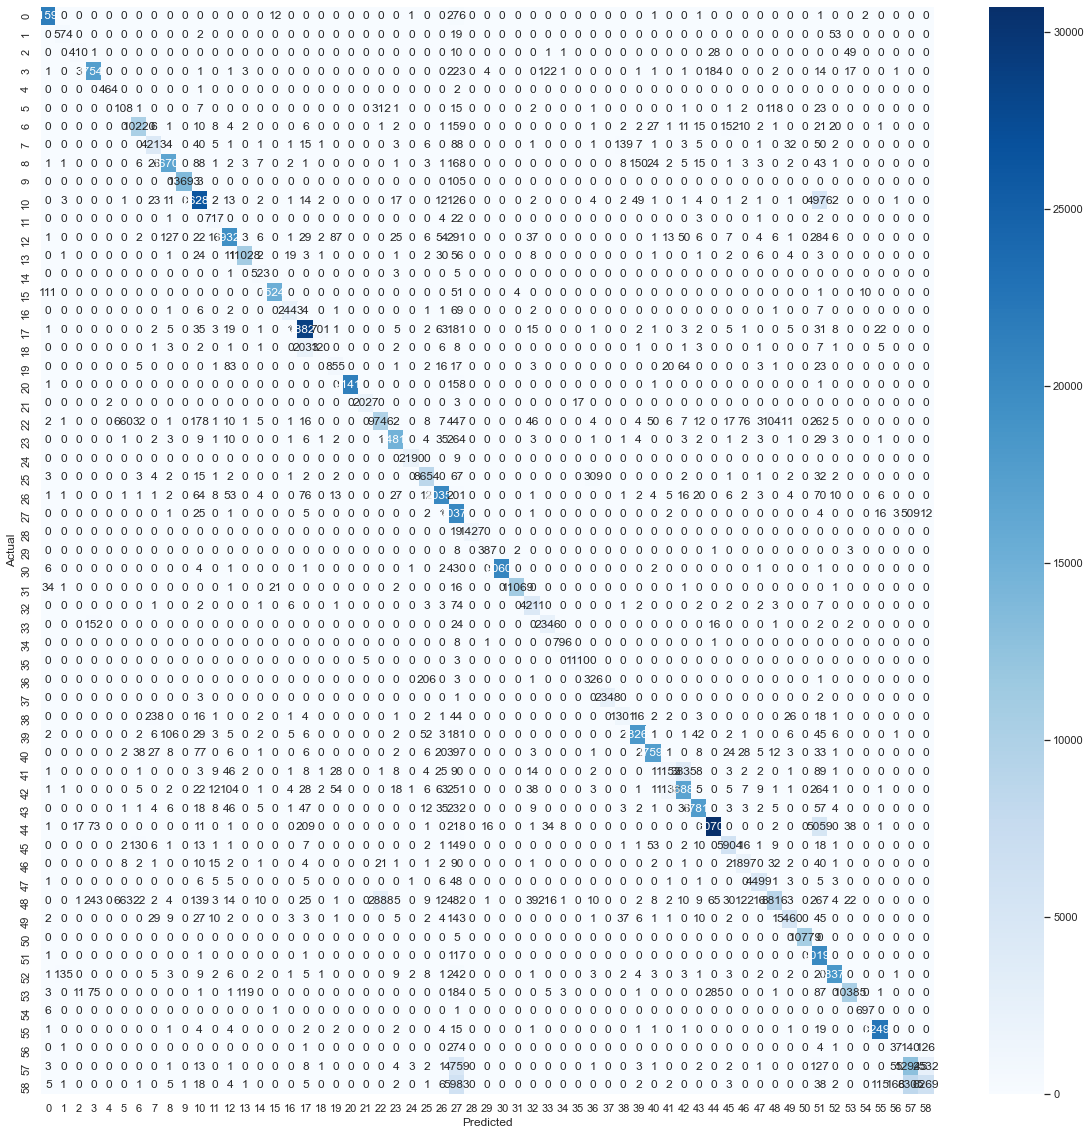

In [119]:
plot_Confusion_Matrix(y_test,test_predictions)

In [120]:
balanced_accuracy_score(y_test, test_predictions)

0.8646232518318155

In [121]:
x = test_df.values[:,  1]
xx1=[]
yy1=[]
X=[]
ll=len(x)
for i in tqdm_notebook(range(0,ll)):
    x[i]=nltk.tokenize.casual_tokenize(x[i])

<ipython-input-121-b0dc939ae76d>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,ll)):


In [122]:
ll=len(x)
for i in tqdm_notebook(range(0,ll)):
   cl=[]
   for token in x[i]:
        if token not in stopword_set:
            cl.append(token)
   x[i]=cl

<ipython-input-122-40645590d170>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,ll)):


In [123]:
x1=[]
length1=len(x)
for j in tqdm_notebook(range(0,length1)):
    temp=[]
    l=x[j]
    for word in l:
        if is_digit(word)==False:
           temp.append(lemmatize(word))
    if temp!=[]:
        x1.append(temp)
    else:
        temp.append('')
        x1.append(temp)

<ipython-input-123-d132f360f087>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm_notebook(range(0,length1)):


In [124]:
ll=len(x1)
x=[]
for i in tqdm_notebook(range(0,ll)):
    l2=len(x1[i])
    for j in range(0,l2):
        x1[i][j]=x1[i][j].lower()   

<ipython-input-124-40b32aba6074>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,ll)):


In [125]:
for i in tqdm_notebook(range(0,len(x1))):
    temp=[]
    for word in x1[i]:
        if word not in delete:
            temp.append(word)
    if temp!=[]:
        x1[i]=temp
    else:
        temp.append('')
        x1[i]=temp

<ipython-input-125-7f1cab80b35c>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,len(x1))):


In [126]:
X = vectorizer.transform(x1)

In [127]:
x1=[]
delete=[]

# Submit

In [128]:
submit_predictions = mod.predict(X)

In [129]:
label_encoder.classes_[0]

'ar'

In [130]:
test_df['language'] = label_encoder.classes_[submit_predictions]

test_df.head()

,index,sentence,language
0,0,תודה לכם .,he
1,1,"Precisamos de compaixão para começar , e auto-...",pt-br
2,2,這個增長相當大 ， 並且它將引發經濟的增長 。,zh-cn
3,3,시애틀에서 자란 제가 처음 가난을 보게 되던 때를 기억해요 .,ko
4,4,これをロボットに組み込みました,ja


In [131]:
(
    test_df[['index',  'language']]
    .to_csv('sample_submission2.csv', index=False)
)

In [ ]:
!head $DATA_PATH/sample_submission.csv

# Homework

### Часть 1. (4 балла)
- исследовать данные
    - почистить обучающую выборку
        - есть ли ошибки в разметке?
    - посмотреть, какие символы / токены встречаются во всех языках
    - выделить коллокации для известных вам языков (хотя бы русский и английский)
- попробовать добавить в модель признаки на основе word2vec или topic modeling
- построить confusion_matrix и посмотреть, какие языки путает модель
- вывести top_k токенов с максимальной важностью для каждого класса
 
### Часть 2. (3 баллов)
- выбить хороший score на private leaderboard'е

In [ ]:
a=[1,2,3,4,5,6]
b=[8,0,0,8,0,8]